In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [171]:
from collections import defaultdict
import numpy as np
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

from bgspy.theory import bgs_segment, bgs_rec, bgs_segment_sc16
from bgspy.utils import signif

In [3]:
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 200
plt.style.use('./buffalo.mplstyle')

In [17]:
def random_pop_fit(col):
    return [float(np.random.choice(x, 1)) for x in col.values]

def group_means(d):
    d_ave = d.groupby(['key']).mean().reset_index()
    d_var = d.groupby(['key'])['y', 'pop_fit'].var().reset_index()
    d_var = d_var.rename(columns={'y': 'y_var', 'pop_fit': 'pop_fit_var'})
    d_grp = pd.concat((d_ave, d_var), axis=1).reset_index()
    return d_grp.sort_values(['sh', 'mu'])

def load_validation(file):
    vda = np.load(file, allow_pickle=True)
    vd = pd.DataFrame(vda['X'], columns=vda['features'])
    vdy = pd.DataFrame(vda['y'], columns=vda['targets'])
    vd['y'] = vdy['Bhat'].astype('float')
    vd['key'] = vda['keys']
    #@vd['theory'] = bgs_segment(vd['mu'], vd['sh'], vd['L'], vd['rbp'], vd['rf'])
    vd['Ef'] = vdy['Ef'].astype('float')
    vd['Vf'] = vdy['Vf'].astype('float')
    vd['load'] = vdy['load']
    vd['nsubs'] = vdy['nsubs'] 
    #import pdb;pdb.set_trace()
    vd['ndel_muts'] = random_pop_fit(vdy['pop_ndels'])
    vd['pop_fit'] = random_pop_fit(vdy['pop_fit'])
    vd['U'] = vd['L'] * vd['mu']
    vd['R'] = [np.max(x) / len(x) for x in vd['nsubs']]
    return vd


## Validation

In [18]:
cache_file = '../data/slim_sims/validate/validate.pkl'
if os.path.exists(cache_file):
    vd = pd.read_pickle()
else:
    vd = load_validation('../data/slim_sims/validate/validate.npz')    
    vd.to_pickle('../data/slim_sims/validate/validate.pkl')

In [19]:
vg = group_means(vd)
vg['rate'] = vd.U / vd.sh

/tmp/ipykernel_75194/1018278079.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  d_var = d.groupby(['key'])['y', 'pop_fit'].var().reset_index()


In [20]:
vg

,index,key,mu,sh,L,rbp,rf,rep,y,Ef,Vf,ndel_muts,pop_fit,U,R,key,y_var,pop_fit_var,rate
19,19,validate_N1000_mu1e-09_sh1e-06_rf1e-09_rbp1e-0...,1.000000e-09,0.000001,10000.0,1.000000e-08,1.000000e-09,4999.5,0.994515,1.000000,3.845115e-14,0.0729,1.000000,0.00001,7.880000e-06,validate_N1000_mu1e-09_sh1e-06_rf1e-09_rbp1e-0...,0.226986,1.133057e-13,31.622777
8,8,validate_N1000_mu1e-08_sh1e-06_rf1e-09_rbp1e-0...,1.000000e-08,0.000001,10000.0,1.000000e-08,1.000000e-09,4999.5,1.003066,0.999999,4.010725e-13,0.8016,0.999999,0.00010,8.014000e-05,validate_N1000_mu1e-08_sh1e-06_rf1e-09_rbp1e-0...,0.230458,1.342847e-12,0.010000
21,21,validate_N1000_mu1e-09_sh3.16227766e-06_rf1e-0...,1.000000e-09,0.000003,10000.0,1.000000e-08,1.000000e-09,4999.5,0.993566,1.000000,3.908091e-13,0.0765,1.000000,0.00001,7.700000e-06,validate_N1000_mu1e-09_sh3.16227766e-06_rf1e-0...,0.215170,1.154414e-12,100.000000
10,10,validate_N1000_mu1e-08_sh3.16227766e-06_rf1e-0...,1.000000e-08,0.000003,10000.0,1.000000e-08,1.000000e-09,4999.5,1.000317,0.999998,3.954138e-12,0.7863,0.999998,0.00010,7.995000e-05,validate_N1000_mu1e-08_sh3.16227766e-06_rf1e-0...,0.224305,1.323404e-11,0.003162
18,18,validate_N1000_mu1e-09_sh1e-05_rf1e-09_rbp1e-0...,1.000000e-09,0.000010,10000.0,1.000000e-08,1.000000e-09,4999.5,1.001052,0.999999,3.899543e-12,0.0759,0.999999,0.00001,7.610000e-06,validate_N1000_mu1e-09_sh1e-05_rf1e-09_rbp1e-0...,0.222547,1.160516e-11,1.000000
7,7,validate_N1000_mu1e-08_sh1e-05_rf1e-09_rbp1e-0...,1.000000e-08,0.000010,10000.0,1.000000e-08,1.000000e-09,4999.5,1.006052,0.999992,4.010282e-11,0.8049,0.999992,0.00010,7.882000e-05,validate_N1000_mu1e-08_sh1e-05_rf1e-09_rbp1e-0...,0.230442,1.353247e-10,31.622777
20,20,validate_N1000_mu1e-09_sh3.16227766e-05_rf1e-0...,1.000000e-09,0.000032,10000.0,1.000000e-08,1.000000e-09,4999.5,0.994905,0.999998,3.787932e-11,0.0771,0.999998,0.00001,7.525000e-06,validate_N1000_mu1e-09_sh3.16227766e-05_rf1e-0...,0.216959,1.145198e-10,10.000000
9,9,validate_N1000_mu1e-08_sh3.16227766e-05_rf1e-0...,1.000000e-08,0.000032,10000.0,1.000000e-08,1.000000e-09,4999.5,1.001858,0.999976,3.845273e-10,0.7628,0.999976,0.00010,7.519500e-05,validate_N1000_mu1e-08_sh3.16227766e-05_rf1e-0...,0.222176,1.328439e-09,0.316228
11,11,validate_N1000_mu1e-09_sh0.0001_rf1e-09_rbp1e-...,1.000000e-09,0.000100,10000.0,1.000000e-08,1.000000e-09,4999.5,1.001210,0.999993,3.877800e-10,0.0768,0.999993,0.00001,6.355000e-06,validate_N1000_mu1e-09_sh0.0001_rf1e-09_rbp1e-...,0.221518,1.085626e-09,1.000000
0,0,validate_N1000_mu1e-08_sh0.0001_rf1e-09_rbp1e-...,1.000000e-08,0.000100,10000.0,1.000000e-08,1.000000e-09,4999.5,0.994808,0.999928,3.711620e-09,0.7182,0.999928,0.00010,6.628500e-05,validate_N1000_mu1e-08_sh0.0001_rf1e-09_rbp1e-...,0.221588,1.197047e-08,10.000000


[]

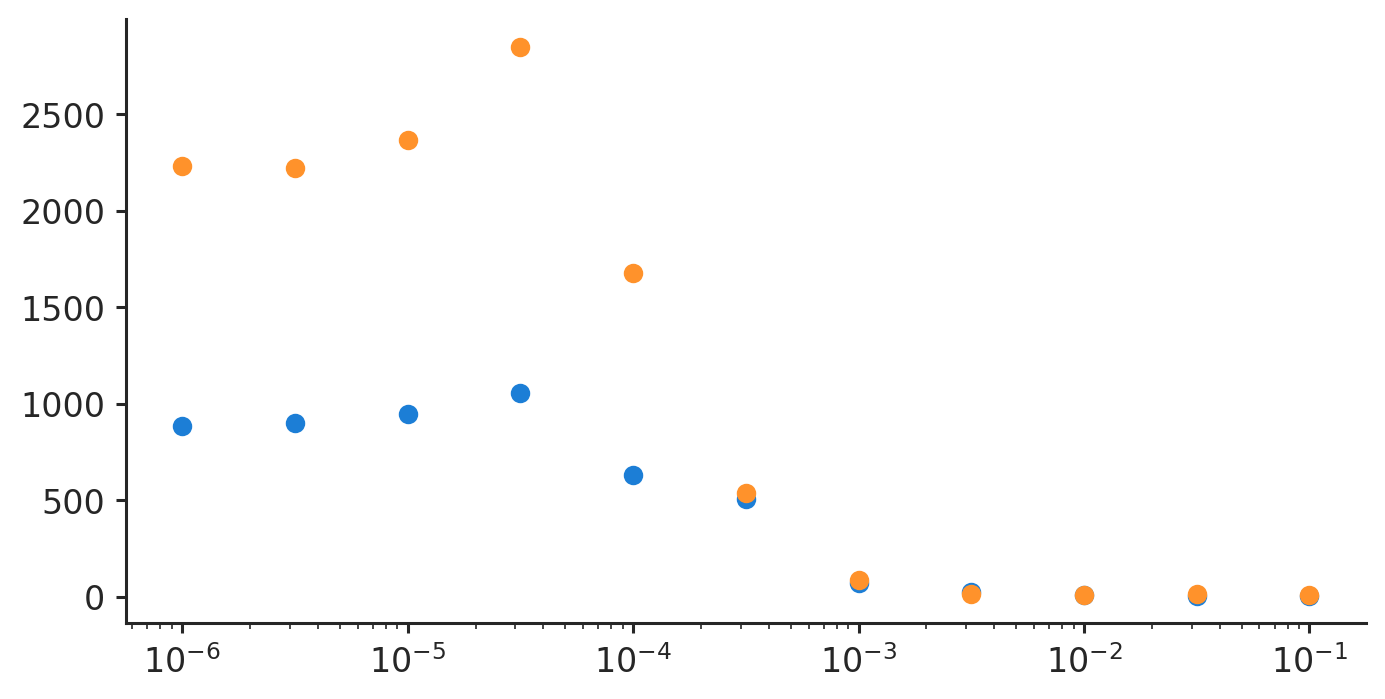

In [258]:
f, ax = plt.subplots()

#sns.scatterplot(data=vg, x='sh', y='pop_fit_var', hue='mu', ax=ax)
for u in vg['U'].unique():
    vgs = vg.loc[vg.U == u]
    Vf = vgs.Vf
    plt.scatter(vgs.sh, 10**(1/(vgs.Vf/vgs.pop_fit_var)))

plt.semilogx()

[]

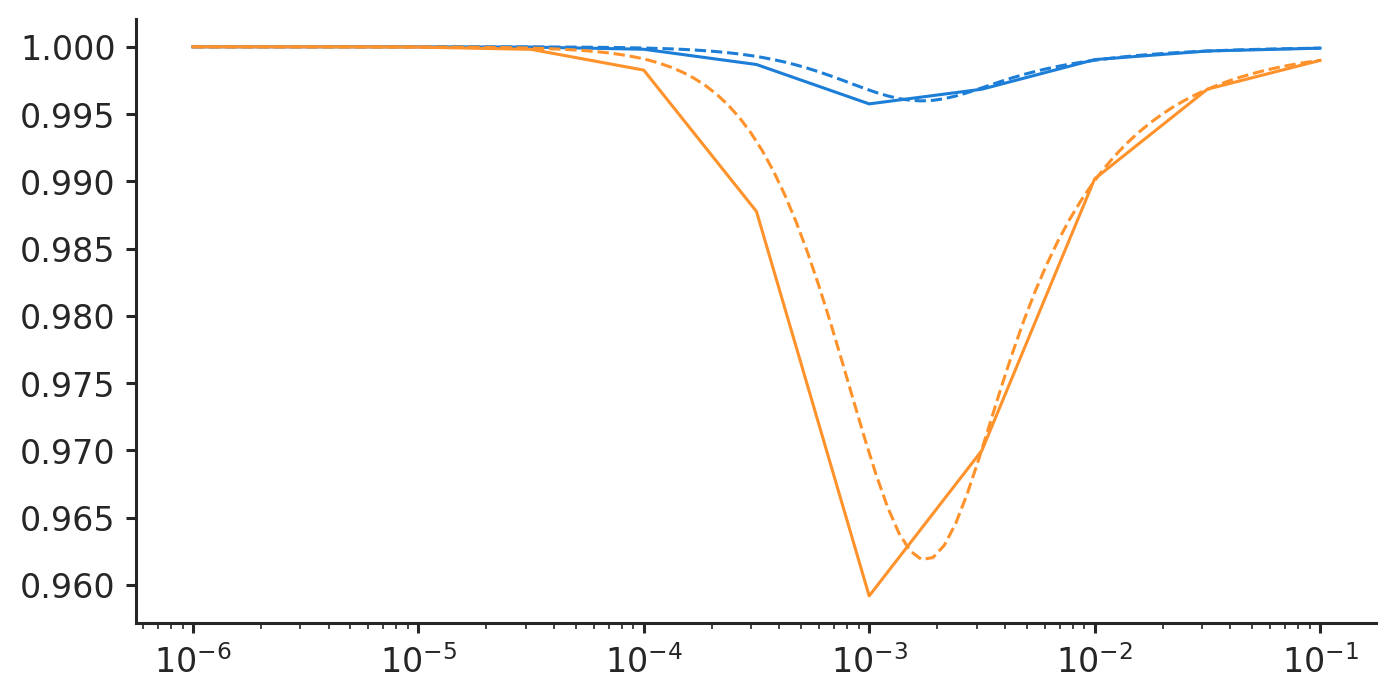

In [249]:
f, ax = plt.subplots()
ax.semilogx()
#sns.scatterplot(data=vg, x='sh', y='pop_fit_var', hue='mu', ax=ax)
for u in vg['U'].unique():
    vgs = vg.loc[vg.U == u]
    Vf = vgs.Vf
    r = vgs['rf'].unique()[0]
    res = bgs_segment_sc16(u, vgs.sh, 1, r, N, return_both=True)
    Q2 = res[2]
    
    # empirical variance -- note the factor of two error here! 
    lines = plt.plot(vgs.sh, np.exp(-1/2*Vf*Q2))
    
    res = bgs_segment_sc16(u, sh, 1, r, N, return_both=True)
    V = res[3]
    Q2 = res[2]
    Ne = res[1]
    # imputed variance
    #plt.plot(sh, np.exp(-V*Q2*2), c=lines[0].get_color(), linestyle='dashed')
    N = 1000
    plt.plot(sh, Ne/N, c=lines[0].get_color(), linestyle='dashed')
plt.semilogx()

[]

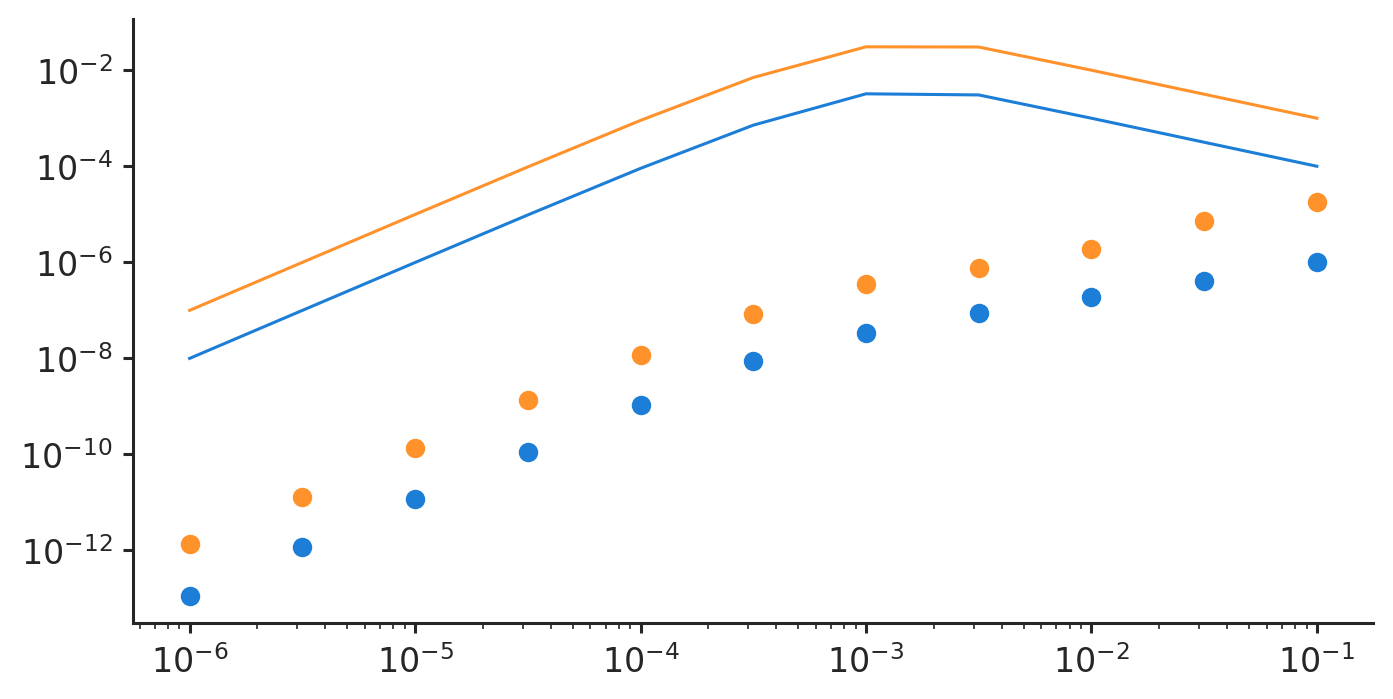

In [217]:
f, ax = plt.subplots()
ax.semilogx()
#sns.scatterplot(data=vg, x='sh', y='pop_fit_var', hue='mu', ax=ax)
for u in vg['U'].unique():
    vgs = vg.loc[vg.U == u]
    Vf = vgs.Vf
    r = vgs['rf'].unique()[0]
    res = bgs_segment_sc16(u, vgs.sh, 1, r, N, return_both=True)
    Q2 = res[2]
    V = res[3]
    plt.scatter(vgs.sh, vgs.pop_fit_var)
    plt.plot(vgs.sh, V*Q2)
plt.loglog()

[]

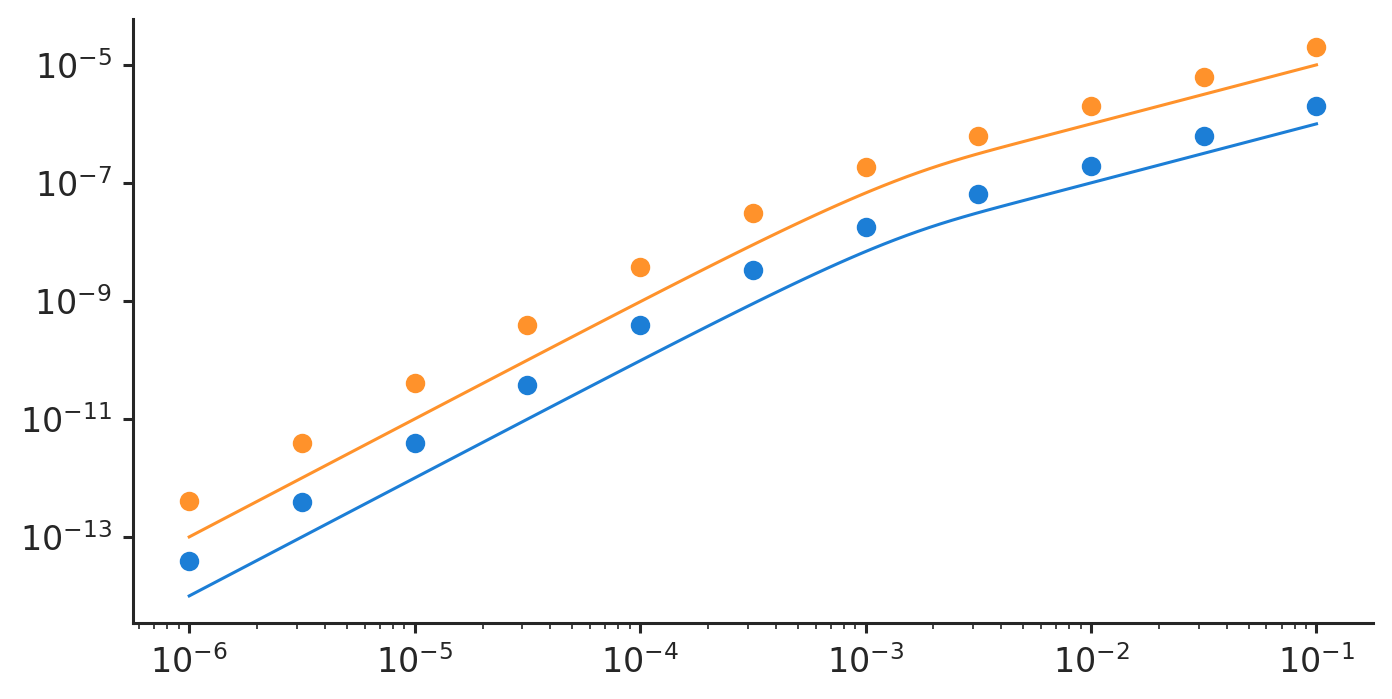

In [190]:
f, ax = plt.subplots()
ax.semilogx()
#sns.scatterplot(data=vg, x='sh', y='pop_fit_var', hue='mu', ax=ax)
for u in vg['U'].unique():
    vgs = vg.loc[vg.U == u]
    Vf = vgs.Vf
    r = vgs['rf'].unique()[0]
    res = bgs_segment_sc16(u, sh, 1, r, N, return_both=True)
    Q2 = res[2]
    V = res[3]
    plt.plot(sh, V)
    plt.scatter(vgs['sh'], Vf) # TODO factor
plt.loglog()

In [ ]:
@np.vectorize
def kmin(theta, N, ploidy=2):
    """
    This is the k of Gessler (1995), which is the smallest 
    fitness class of mutations with ≥ 1 occupents for a population
    of N gametes.
    """
    x = np.arange(np.ceil(theta)+1).astype(int)
    nexp = stats.poisson.pmf(x, theta)*ploidy*N
    if not len(nexp) or not np.any(nexp >= 1):
        return 0
    return x[np.min(np.where(nexp >= 1))]

def best_class(theta, N, k=None, ploidy=1):
    if k is None:
        k = kmin(theta, N, ploidy)
    x = list(range(k, 10000))
    nexp = np.array([stats.poisson.pmf(b, theta, loc=k)*ploidy*N for b in range(k, int(theta))])
    print(nexp)
    return int(k), x[np.min(np.where(nexp >= 1))] 

def ratchet(theta, s, N):
    k = kmin(theta, N)
    b = best_class(theta, N)
    t = b-k
    return s*(k-t)

In [428]:
theta = 10
k = kmin(theta, 1e-5, 1000)

[stats.poisson.pmf(b, theta, loc=k)*N > 1 for b in range(0, 10)]

[False, False, True, True, True, True, True, True, True, True]

In [434]:
k, b = best_class(100, 1000)

s = 1-5
k-(b-k)

[3.72007598e-41 3.72007598e-39 1.86003799e-37 6.20012663e-36
 1.55003166e-34 3.10006331e-33 5.16677219e-32 7.38110313e-31
 9.22637891e-30 1.02515321e-28 1.02515321e-27 9.31957466e-27
 7.76631221e-26 5.97408632e-25 4.26720451e-24 2.84480301e-23
 1.77800188e-22 1.04588346e-21 5.81046366e-21 3.05813877e-20
 1.52906938e-19 7.28128278e-19 3.30967399e-18 1.43898869e-17
 5.99578622e-17 2.39831449e-16]


ValueError: zero-size array to reduction operation minimum which has no identity

In [96]:
sh = np.logspace(-6, -1, 100)

/tmp/ipykernel_75194/1592018779.py:15: RuntimeWarning: divide by zero encountered in true_divide
  T = 1/R
/tmp/ipykernel_75194/1592018779.py:15: RuntimeWarning: divide by zero encountered in true_divide
  T = 1/R


(1e-08, 0.0001)

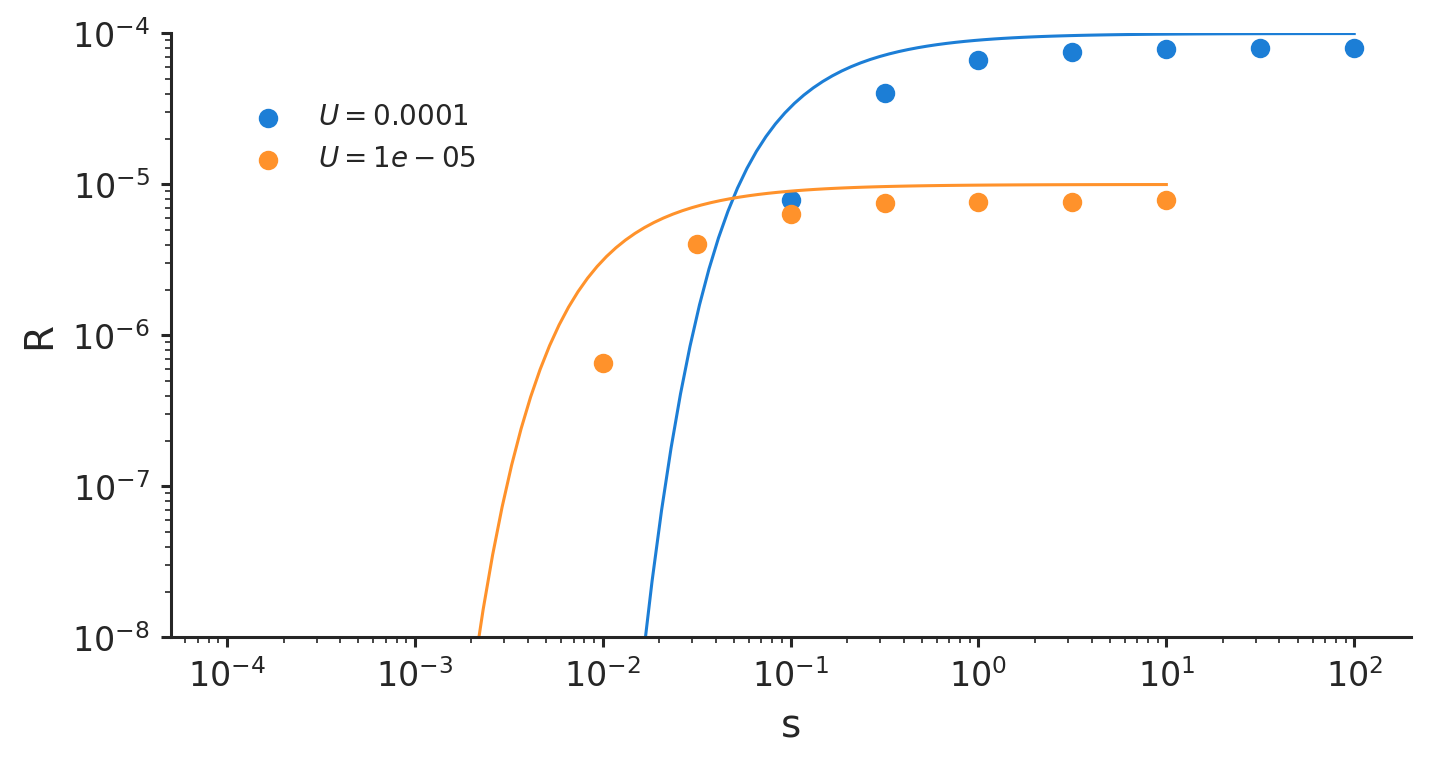

In [48]:
Us = [1e-4, 1e-5]

for U in Us:
    #plt.plot(sh, 2*(U * sh - sh/bgs_segment_sc16(U, sh, 1, rf, N, return_both=True)[0]))
    vga = vg.loc[vg['U'] == U]
    plt.scatter(U/vga['sh'], vga['R'], label=f"$U = {U}$")
    #plt.plot(sh, 2*(U * sh - sh/bgs_segment_sc16(U, sh, 1, rf, N, return_both=True)[0]))
    lines = plt.plot(U/sh, 1/bgs_segment_sc16(U, sh, 1, 1e-9, 1000, return_both=True)[0])
    
    R = vga['R'].values
    s = vga['sh'].values
    idx = np.argsort(s)
    s, R = s[idx], R[idx]
    T = 1/R
    #plt.plot(s, R, c=lines[0].get_color(), linestyle='dashed')
    
plt.ylabel("R")
plt.xlabel("s")
plt.legend()
plt.loglog()
plt.ylim(1e-8, 1e-4)

/tmp/ipykernel_75194/3386889709.py:14: RuntimeWarning: divide by zero encountered in true_divide
  T = 1/R
/tmp/ipykernel_75194/3386889709.py:14: RuntimeWarning: divide by zero encountered in true_divide
  T = 1/R


(1e-08, 0.0001)

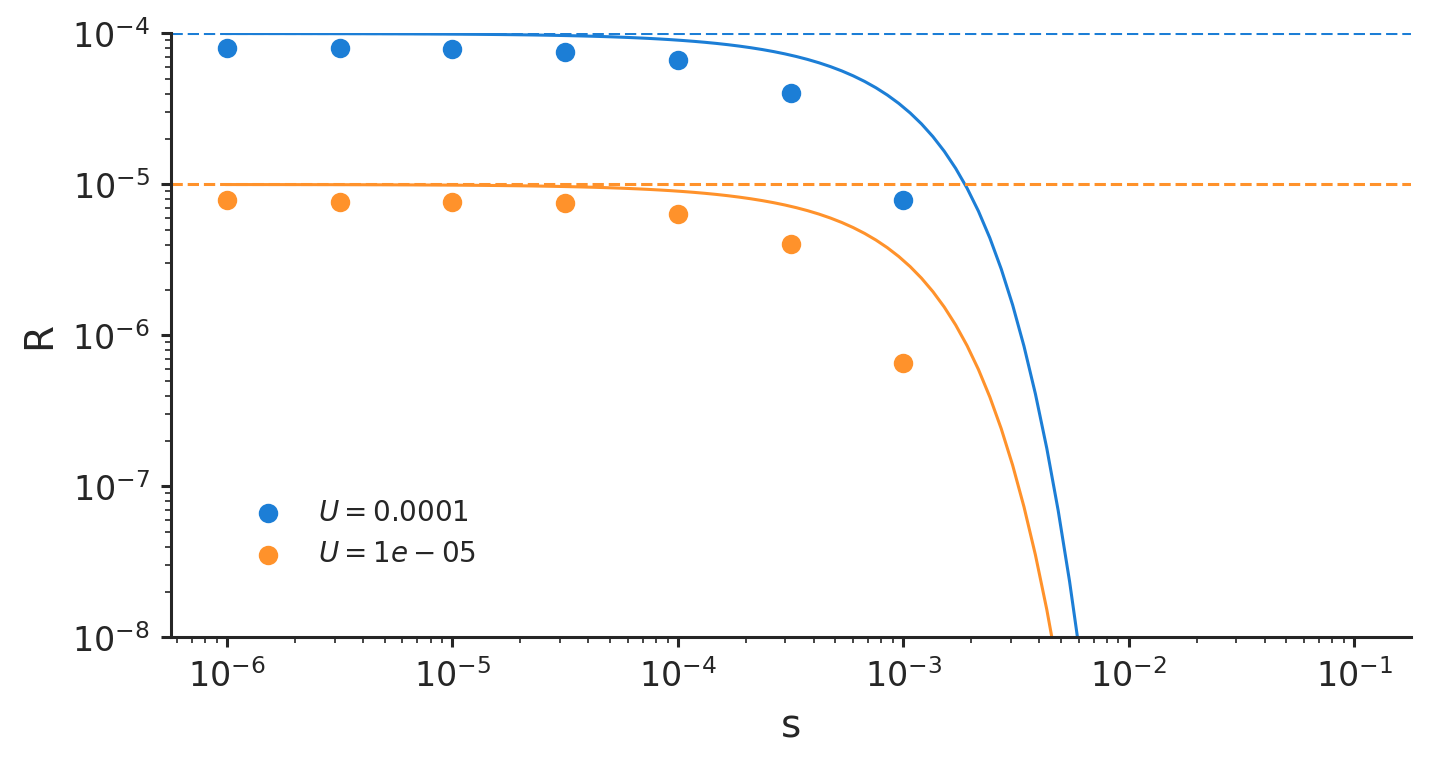

In [53]:
Us = [1e-4, 1e-5]

for U in Us:
    #plt.plot(sh, 2*(U * sh - sh/bgs_segment_sc16(U, sh, 1, rf, N, return_both=True)[0]))
    vga = vg.loc[vg['U'] == U]
    plt.scatter(vga['sh'], vga['R'], label=f"$U = {U}$")
    #plt.plot(sh, 2*(U * sh - sh/bgs_segment_sc16(U, sh, 1, rf, N, return_both=True)[0]))
    lines = plt.plot(sh, 1/bgs_segment_sc16(U, sh, 1, 1e-9, 1000, return_both=True)[0])
    
    R = vga['R'].values
    s = vga['sh'].values
    idx = np.argsort(s)
    s, R = s[idx], R[idx]
    T = 1/R
    #plt.plot(s, R, c=lines[0].get_color(), linestyle='dashed')
    plt.axhline(U, c=lines[0].get_color(), linestyle='dashed')
    
plt.ylabel("R")
plt.xlabel("s")
plt.legend()
plt.loglog()
plt.ylim(1e-8, 1e-4)

[]

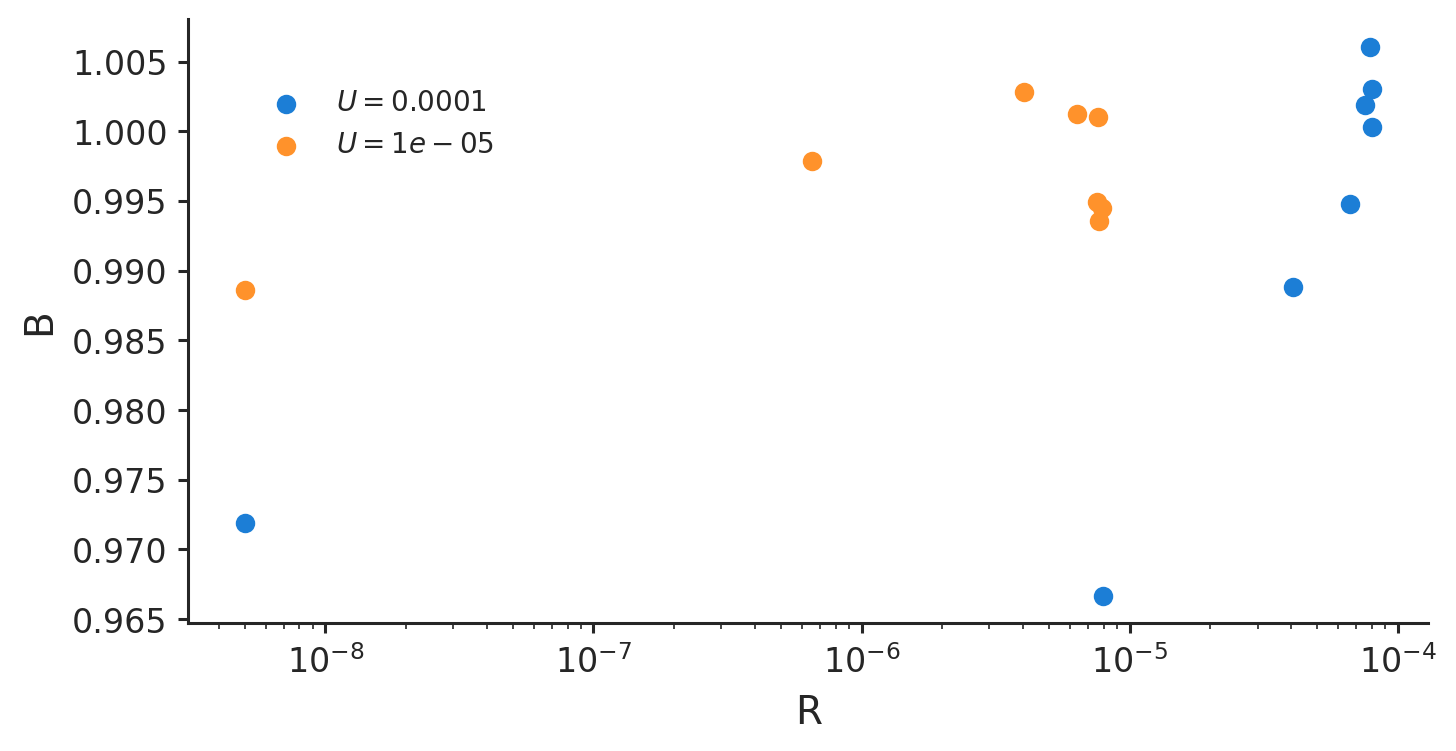

In [54]:
Us = [1e-4, 1e-5]

for U in Us:
    #plt.plot(sh, 2*(U * sh - sh/bgs_segment_sc16(U, sh, 1, rf, N, return_both=True)[0]))
    vga = vg.loc[vg['U'] == U]
    plt.scatter(vga['R'], vga['y'], label=f"$U = {U}$")

    
plt.ylabel("B")
plt.xlabel("R")
plt.legend()
plt.semilogx()

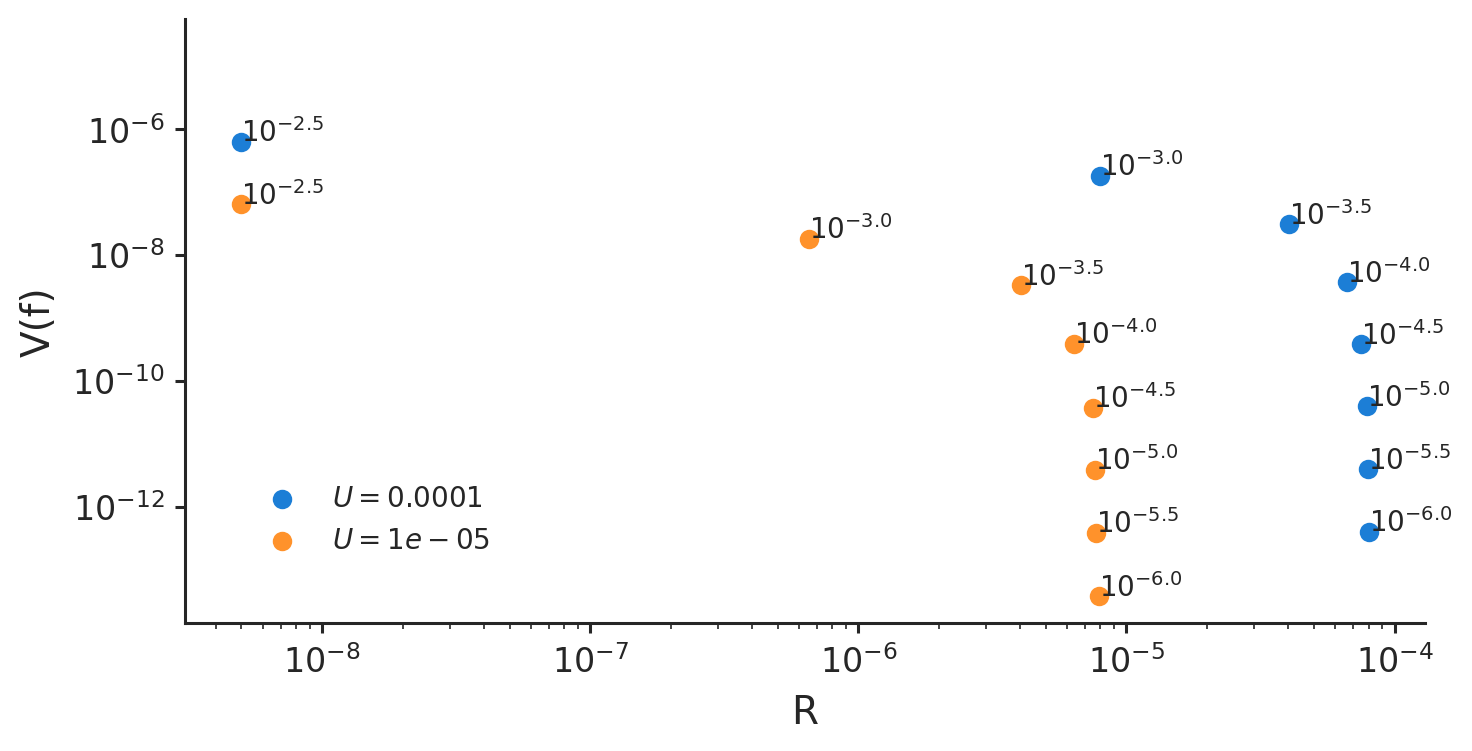

In [60]:
sh = np.logspace(-5, -0.00001, 100)

rf = 1e-8
Us = [1e-4, 1e-5]
N = 1000

for U in Us:
    vga = vg.loc[vg['U'] == U]
    plt.scatter(vga['R'], vga['Vf'], label=f"$U = {U}$")
    R = vga['R'].values
    Vf = vga['Vf'].values
    sh = vga['sh'].values
    for i in range(vga['R'].size):
        plt.annotate(f"$10^{{{np.round(np.log10(sh[i]), 3)}}}$", (R[i], Vf[i]))
plt.loglog()
plt.ylabel("V(f)")
plt.xlabel("R")
plt.legend()

/home/vsb/projects/bprime/bgspy/theory.py:45: RuntimeWarning: overflow encountered in exp
  start_T = (np.exp(2*sh*N) - 1)/(2*U*sh*N)
/home/vsb/projects/bprime/bgspy/theory.py:51: RuntimeWarning: overflow encountered in exp
  return [np.log((np.exp(2*sh*Ne) - 1)/(2*U*sh*Ne)) - np.log(T),
/home/vsb/projects/bprime/bgspy/theory.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return [np.log((np.exp(2*sh*Ne) - 1)/(2*U*sh*Ne)) - np.log(T),
/home/vsb/projects/bprime/bgspy/theory.py:57: UserWarning: no solution found!
  warnings.warn("no solution found!")
/home/vsb/miniconda3/envs/bprime/lib/python3.8/site-packages/numpy/lib/function_base.py:2246: RuntimeWarning: invalid value encountered in func (vectorized)
  outputs = ufunc(*inputs)
/tmp/ipykernel_75194/2887121203.py:14: RuntimeWarning: divide by zero encountered in true_divide
  T = 1/R
/home/vsb/projects/bprime/bgspy/theory.py:45: RuntimeWarning: overflow encountered in exp
  start_T = (np.exp(2*sh*N) - 1)/(2*U*sh*N)

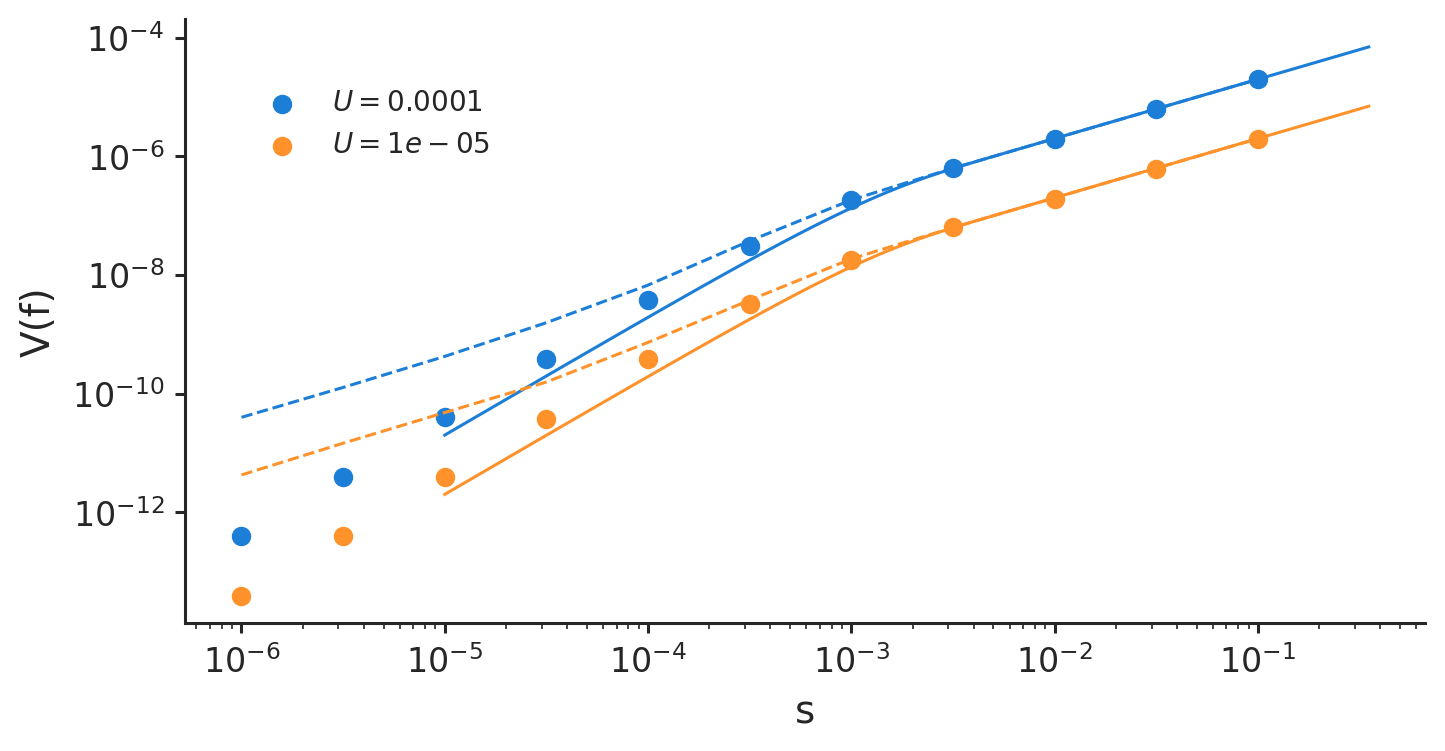

In [61]:
sh = np.logspace(-5, -0.00001, 100)

rf = 1e-8
Us = [1e-4, 1e-5]
N = 1000

for U in Us:
    lines = plt.plot(sh, 2*(U * sh - sh/bgs_segment_sc16(U, sh, 1, rf, N, return_both=True)[0]))
    vga = vg.loc[vg['U'] == U]
    R = vga['R'].values
    s = vga['sh'].values
    idx = np.argsort(s)
    s, R = s[idx], R[idx]
    T = 1/R
    plt.plot(s, 2*(U * s - s/T), c=lines[0].get_color(), linestyle='dashed')
    plt.scatter(vga['sh'], vga['Vf'], label=f"$U = {U}$")

plt.loglog()
plt.ylabel("V(f)")
plt.xlabel("s")
plt.legend()

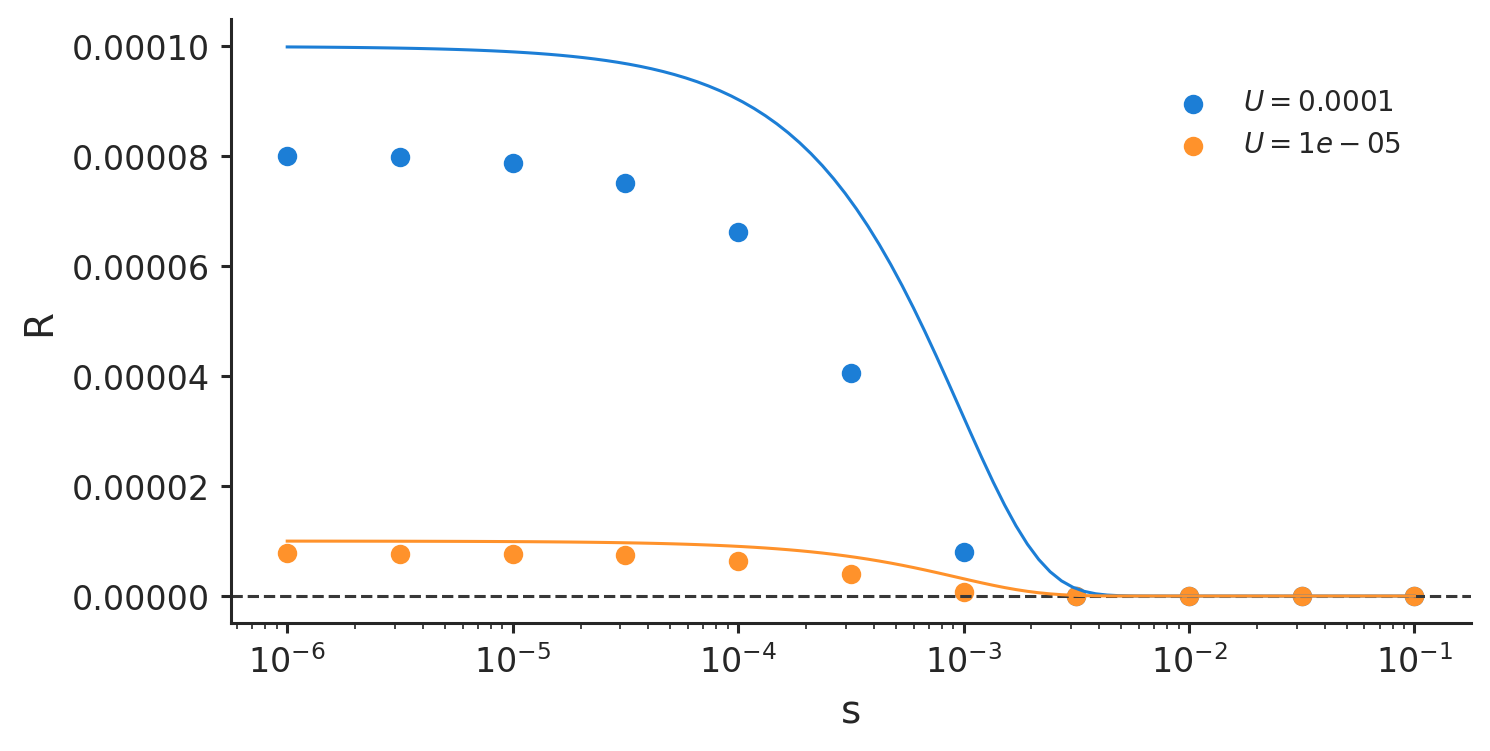

In [76]:
rf = 1e-8
Us = [1e-4, 1e-5]
N = 1000

plt.axhline(0, c='0.22', linestyle='dashed')
for U in Us:
    lines = plt.plot(sh, 1/bgs_segment_sc16(U, sh, 1, rf, N, return_both=True)[0])
    vga = vg.loc[vg['U'] == U]
    plt.scatter(vga['sh'], vga['R'], label=f"$U = {U}$")

plt.semilogx()
plt.ylabel("R")
plt.xlabel("s")
plt.legend()

[]

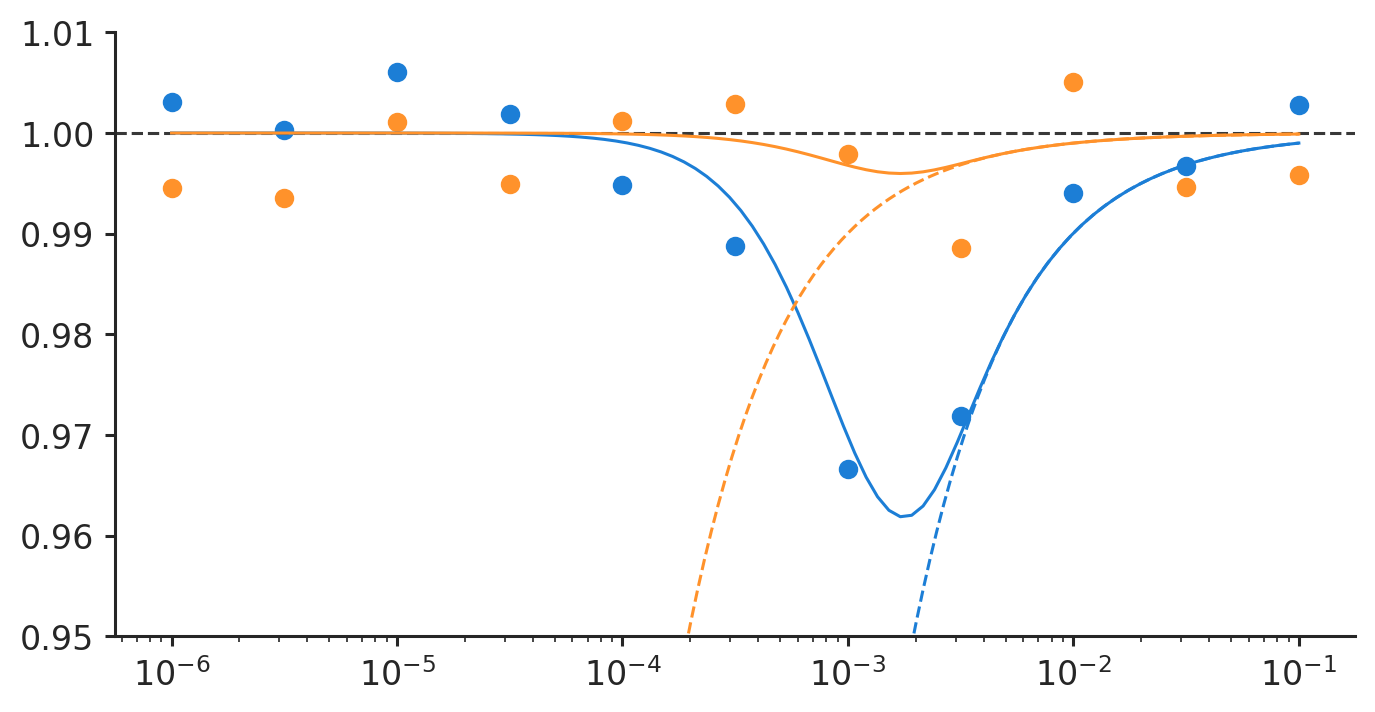

In [116]:
rf = 1e-8
Us = [1e-4, 1e-5]
N = 1000

plt.axhline(1, c='0.22', linestyle='dashed')
for U in Us:
    #lines = plt.plot(sh, 1/bgs_segment_sc16(U, sh, 1, rf, N, return_both=True)[0])
    vga = vg.loc[vg['U'] == U]
    plt.scatter(vga['sh'], vga['y'], label=f"$U = {U}$")
    sc16 = bgs_segment_sc16(U, sh, 1, rf, N)
    lines = plt.plot(sh, sc16)
    sh_alt = np.logspace(-4, -1, 100)
    plt.plot(sh_alt, np.exp(-U/sh_alt), c=lines[0].get_color(), linestyle='dashed')
plt.ylim(0.95, 1.01)
plt.semilogx()

## Dimensionality Reduction

In [113]:
vd = load_validation('../data/slim_sims/validate_dim/validate_dim.npz')

# fix for annoying upstream bug 
vd['key'] = [k.replace('.json', '') for k in vd['key']]

vd_means = group_means(vd)

vd['muL'] = [str(signif(v, 2)) for v in vd['mu']*vd['L']]
vd = vd.sort_values(['muL'])

vd_means['muL'] = [str(signif(v, 2)) for v in vd_means['mu']*vd_means['L']]
vd_means = vd_means.sort_values(['muL'])

[]

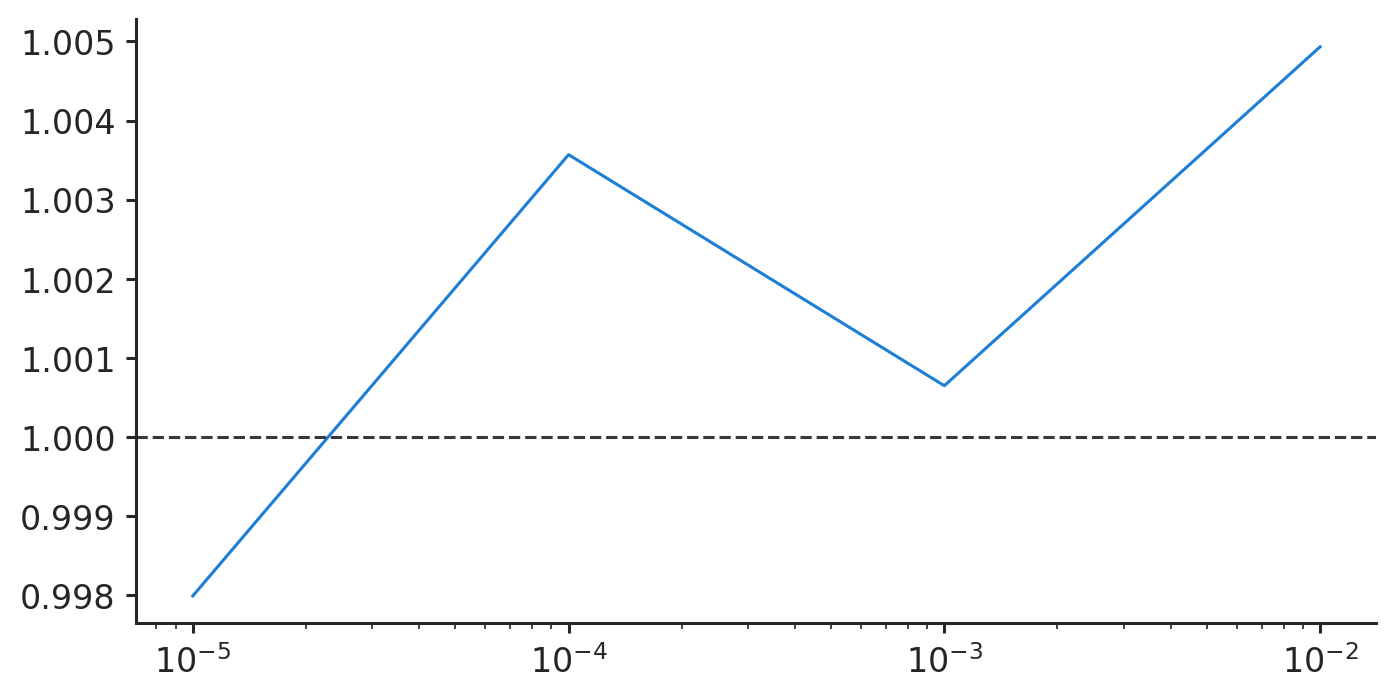

In [133]:
dd = group_means(vd.loc[(vd.mu == 1e-9) & (vd.L == 10_000)])

plt.plot(dd['sh'], dd['y'])
plt.axhline(1, linestyle='dashed', c='0.22')
plt.semilogx()

[]

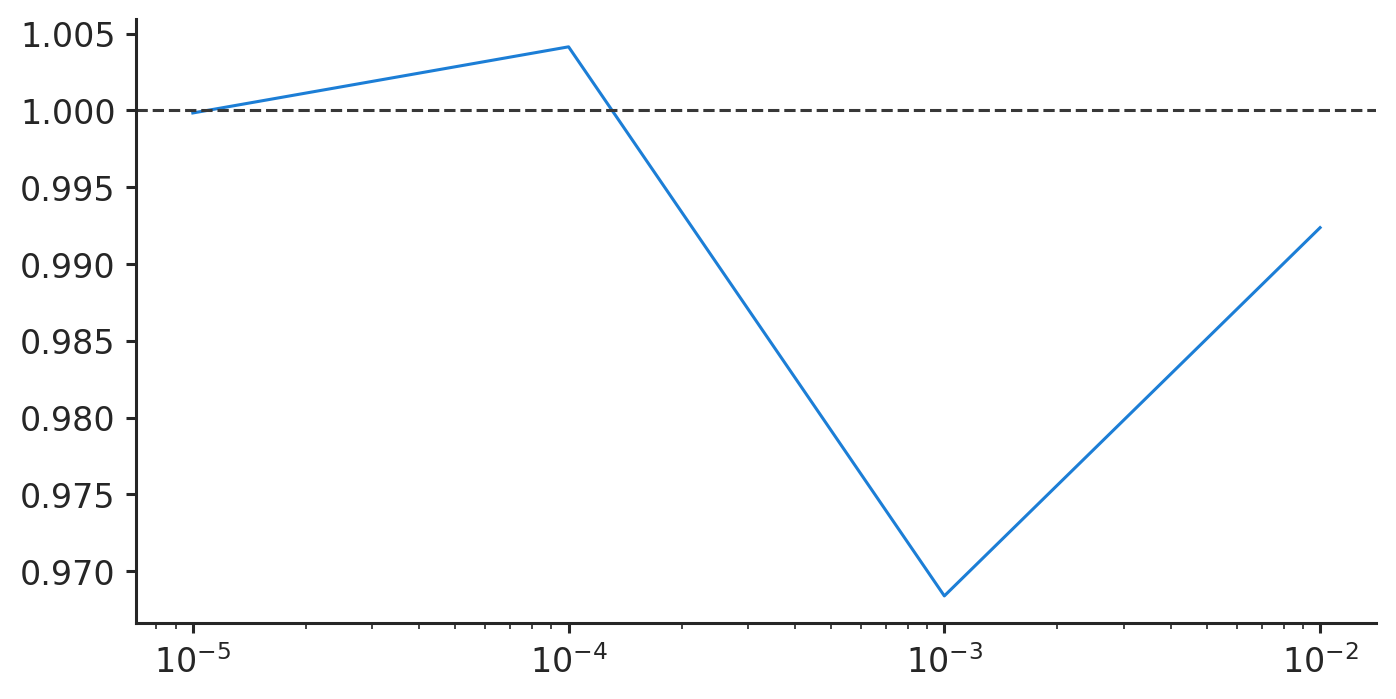

In [153]:
dd = group_means(vd.loc[(vd.mu == 1e-8) & (vd.L == 10_000)])

plt.plot(dd['sh'], dd['y'])
plt.axhline(1, linestyle='dashed', c='0.22')
plt.semilogx()

Using Chebychef, what are the error bounds?

Text(0.5, 0, 'ε')

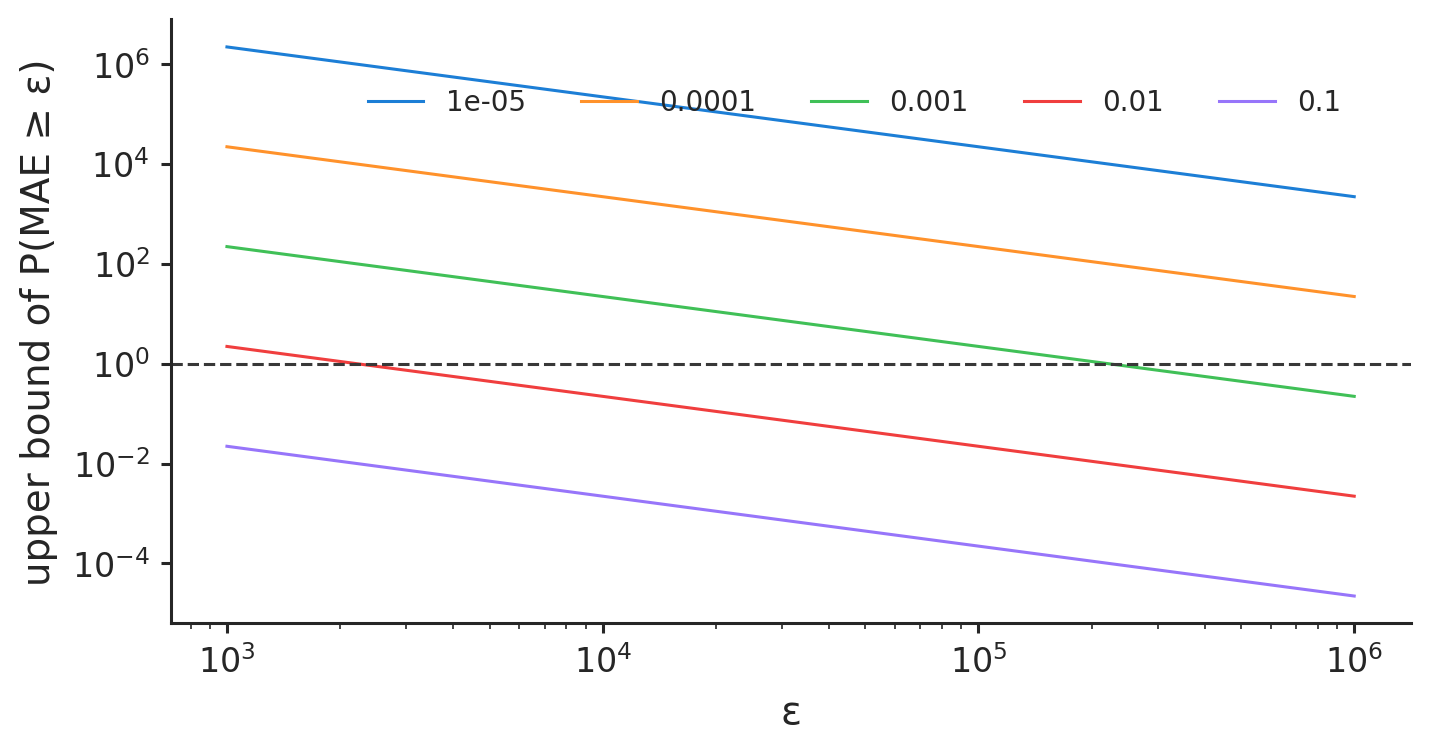

In [148]:
r = np.array([1000, 5000, 10_000, 50_000, 100_000, 1_000_000])
for eps in np.logspace(-5, -1, 5):
    plt.plot(r, 2/(9*r*eps**2), label=eps)
    plt.loglog()
plt.axhline(1, linestyle='dashed', c='0.22')
plt.legend(ncol=5)
plt.ylabel('upper bound of P(MAE ≥ ε)')
plt.xlabel('ε')

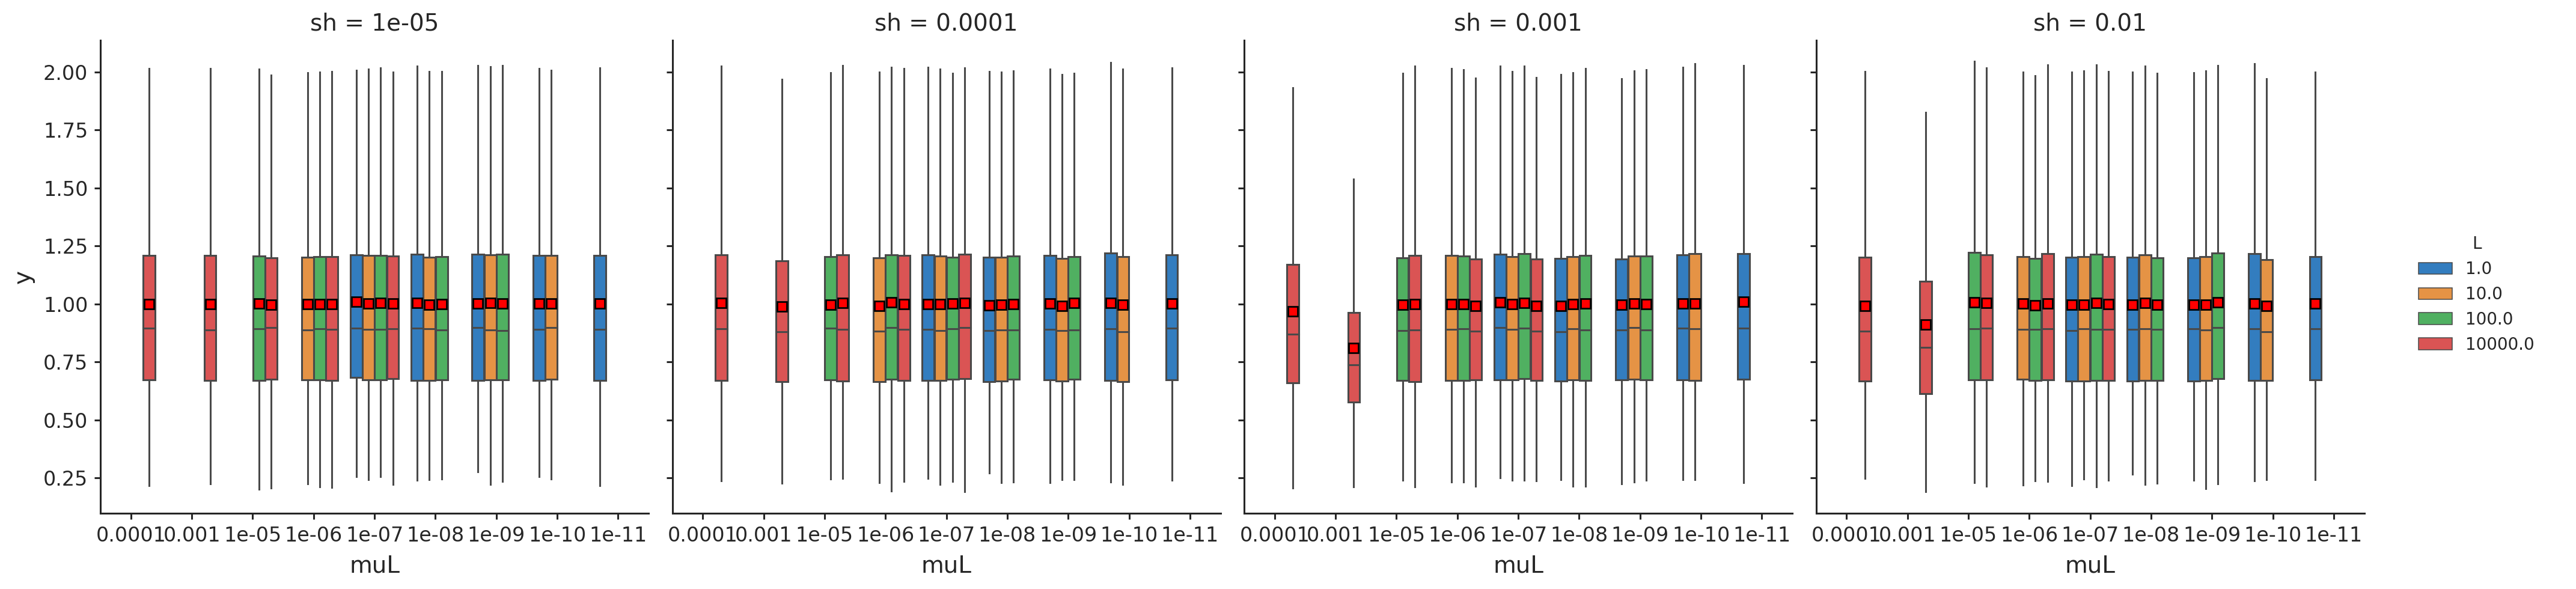

In [119]:
sns.catplot(x='muL', y='y', hue='L', data=vd, col='sh', kind='box', showmeans=True)

(0.95, 1.03)

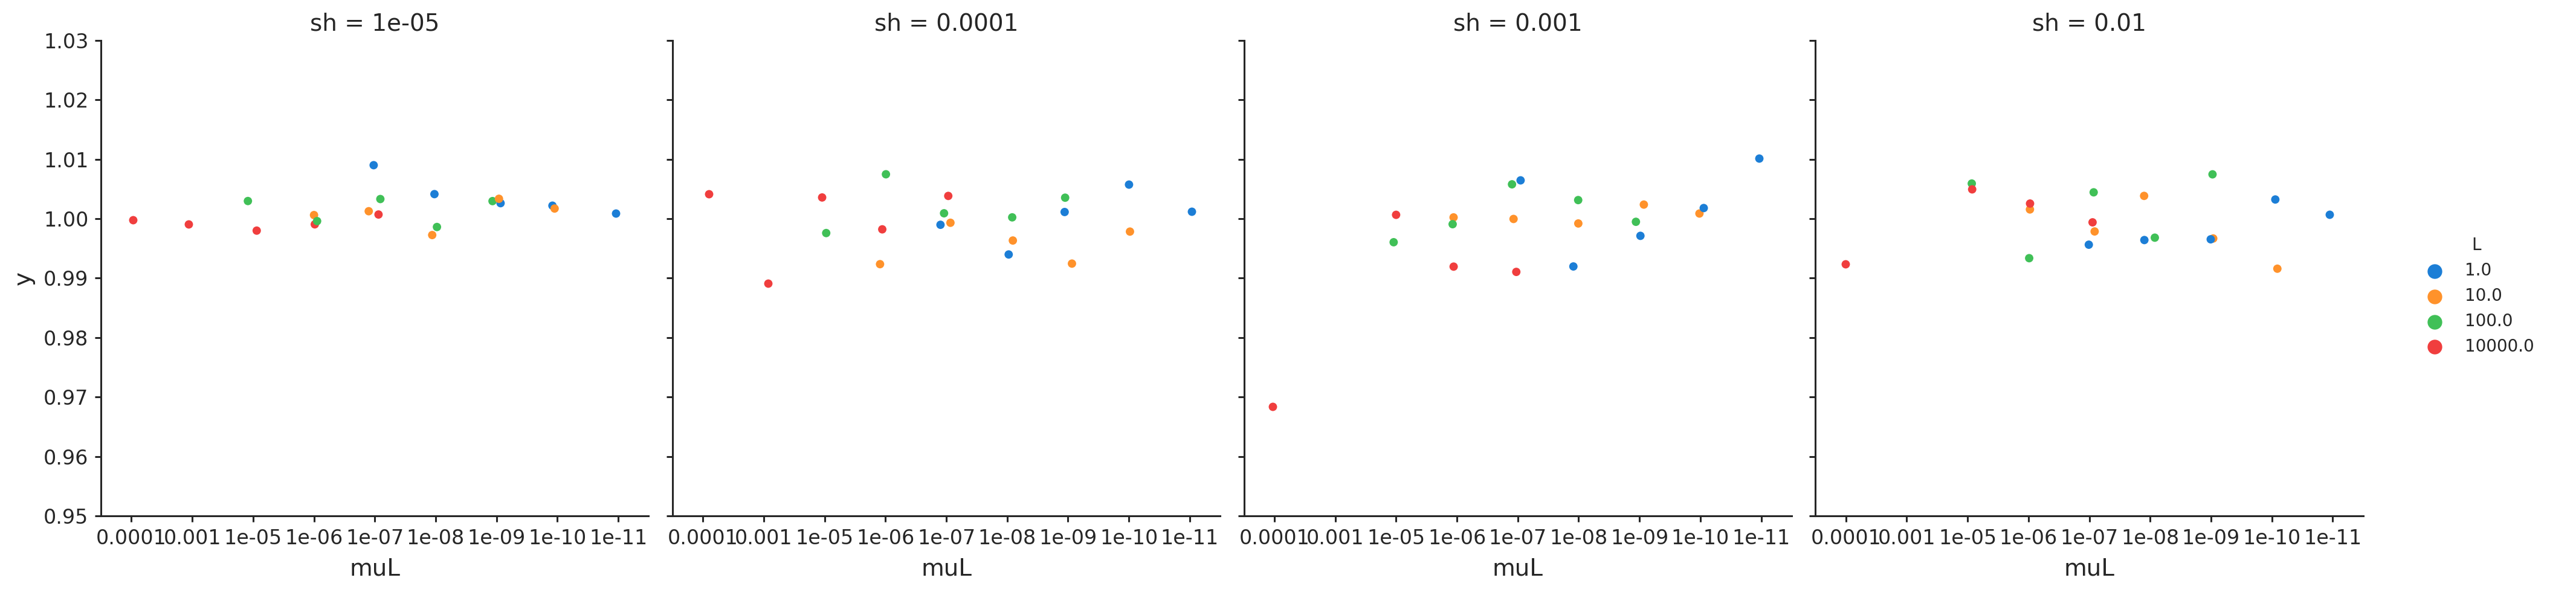

In [120]:
sns.catplot(x='muL', y='y', hue='L', data=vd_means, col='sh')
plt.ylim(0.95, 1.03)

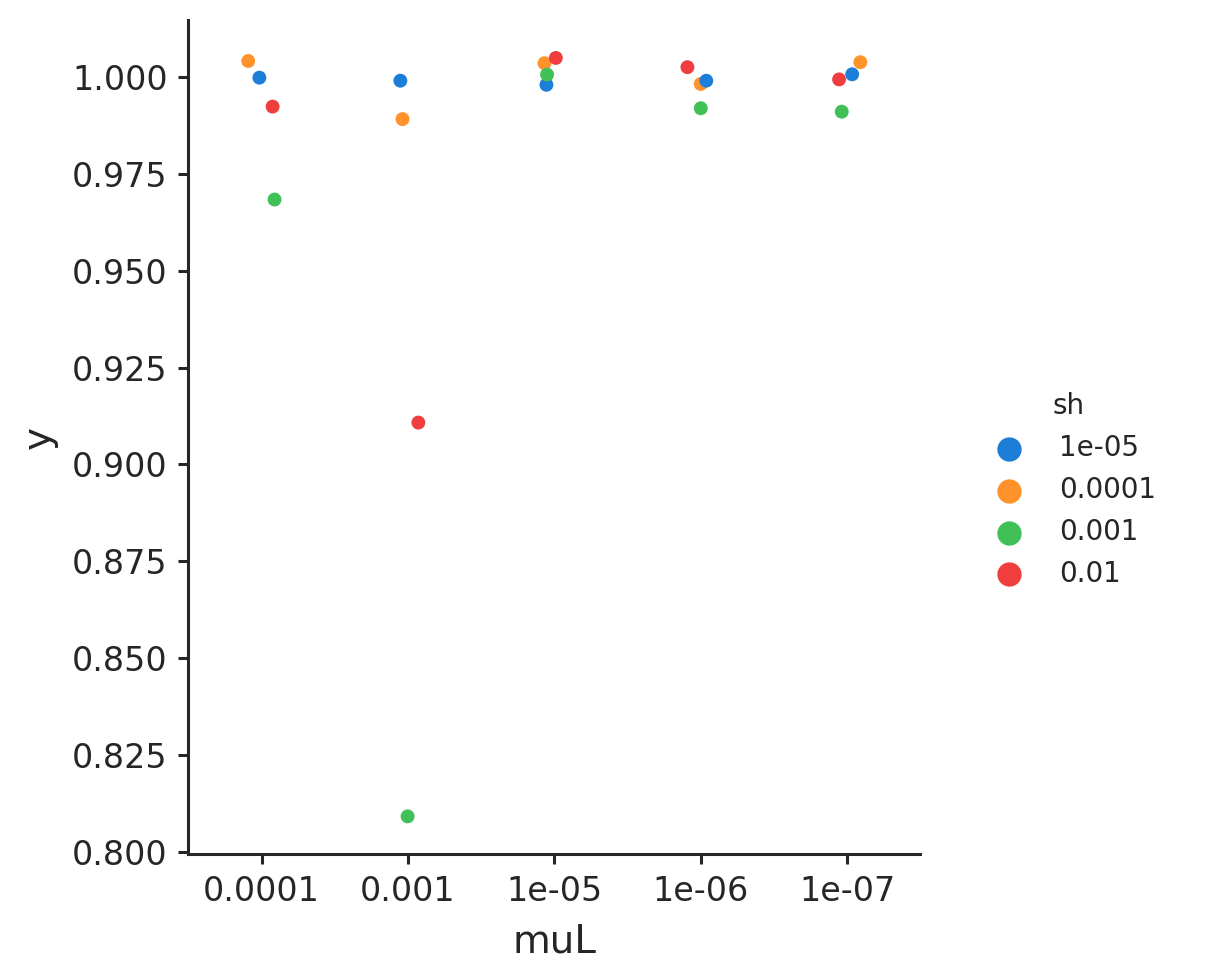

In [121]:
sns.catplot(x='muL', y='y', hue='sh', data=vd_means.loc[vd_means['L'] == 10_000])

## Recombination in the Segment

In [56]:
vd = load_validation('../data/slim_sims/validate_rbp/validate_rbp.npz')

In [59]:
vd['rbp'].unique()

array([1.e-09, 1.e-10, 1.e-07, 1.e-08])

<AxesSubplot:xlabel='sh', ylabel='y'>

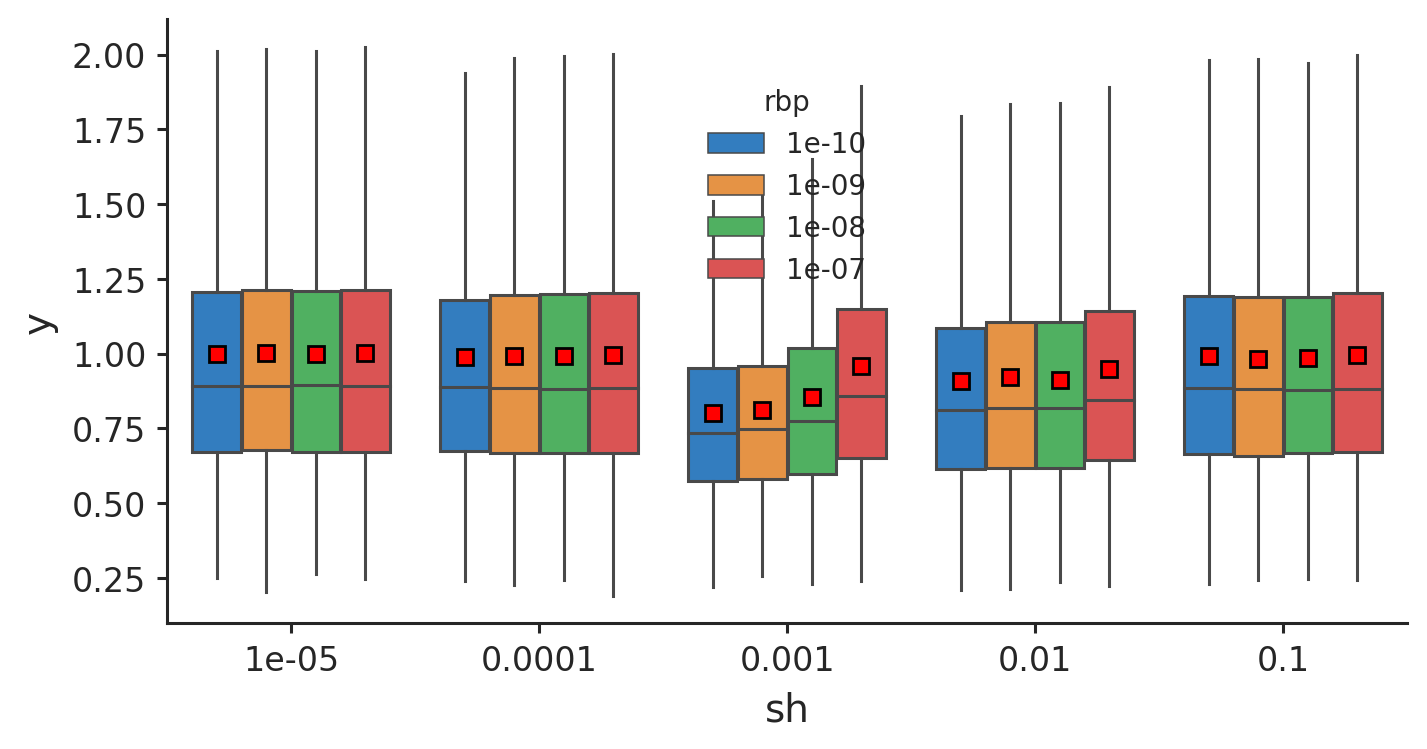

In [63]:
sns.boxplot(x='sh', y='y', hue='rbp', data=vd, showmeans=True)

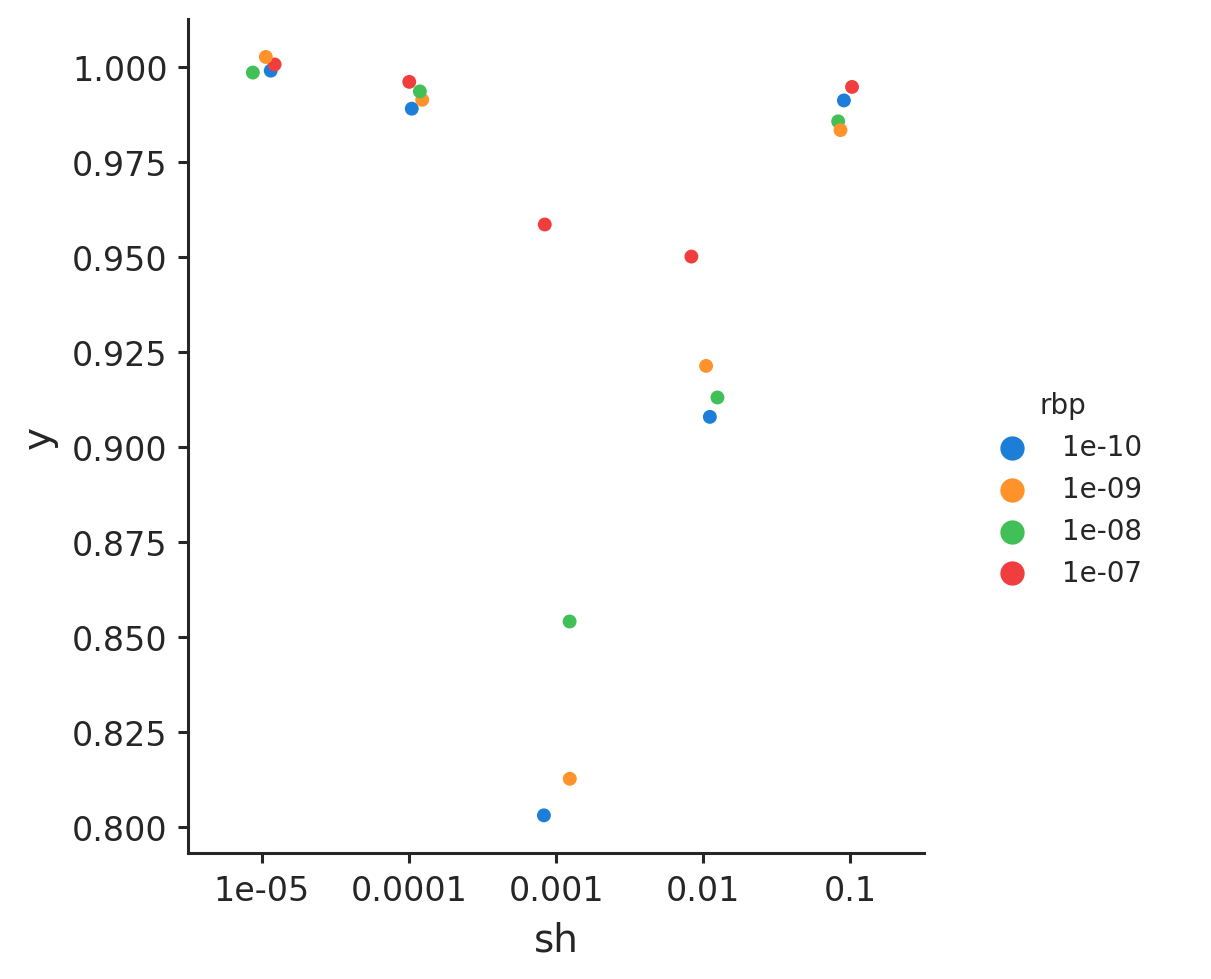

In [70]:
vd_means = group_means(vd)
vd_means['rbp'] = [signif(x, 2) for x in vd_means['rbp']]
sns.catplot(x='sh', y='y', hue='rbp', data=vd_means)